## Анализ данных Titanic: SQL-запросы и визуализации

В этом ноутбуке мы проводим исследовательский анализ данных (EDA) на примере пассажиров Титаника с помощью SQL-запросов и визуализации результатов.

In [134]:
import os
from pathlib import Path
from dotenv import load_dotenv
import psycopg2

load_dotenv()


True

In [135]:
# Берём переменные из .env
DB_HOST = os.getenv("POSTGRES_HOST")
DB_PORT = os.getenv("POSTGRES_PORT")
DB_NAME = os.getenv("POSTGRES_DB")
DB_USER = os.getenv("POSTGRES_USER")
DB_PASSWORD = os.getenv("POSTGRES_PASSWORD")


In [136]:
def get_db_connection():
    if None in (DB_HOST, DB_PORT, DB_NAME, DB_USER):
        raise ValueError("Одна из переменных окружения не задана!")
    conn = psycopg2.connect(
        host=DB_HOST,
        port=DB_PORT,
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD
    )
    return conn

conn = get_db_connection()

In [137]:
from pathlib import Path

def load_sql(filename):
    path = Path("sql") / filename
    with open(path, "r", encoding="utf-8") as f:
        return f.read()


In [138]:
from pathlib import Path

# 1. Определяем корень проекта
PROJECT_ROOT = Path.cwd().parent  # родитель папки notebooks
SQL_DIR = PROJECT_ROOT / "sql"

# 2. Проверяем наличие файлов
print("SQL dir exists?", SQL_DIR.exists())
print("SQL files:", list(SQL_DIR.glob("*.sql")))

# 3. Универсальная функция для загрузки SQL
def load_sql(filename):
    path = SQL_DIR / filename
    if not path.exists():
        raise FileNotFoundError(f"SQL file not found: {path}")
    return path.read_text(encoding="utf-8")


SQL dir exists? True
SQL files: [WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/avg_median_purchase.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/category_avg_spent.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/category_spent.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/category_sum.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/difference_pclass.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/lifeboat_status_count.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/no_purchase_passanger.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/nulls_count.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/purchases_below_0.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/survival_stats.sql'), WindowsPath('c:/Users/Акылай/OneDrive/Desktop/my git/titanic/sql/survived

In [140]:
query= load_sql("total_count.sql")
df_total_count




,total_passengers
0,891


In [124]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
sns.set_style("darkgrid")    # стиль графиков
sns.set_context("notebook")  # масштаб и шрифты
sns.set(font_scale=1.1)      # размер шрифта


C:\Users\Акылай\AppData\Local\Temp\ipykernel_20424\808191646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Survived", y="count", data=df_survival, palette=["salmon", "lightblue"])


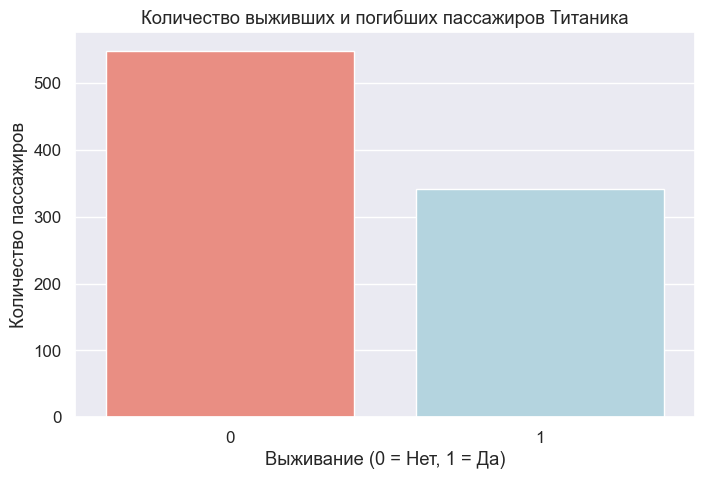

In [141]:
query = load_sql("survival_stats.sql")
plt.figure(figsize=(8, 5))          
sns.barplot(x="Survived", y="count", data=df_survival, palette=["salmon", "lightblue"])
plt.title("Количество выживших и погибших пассажиров Титаника")
plt.xlabel("Выживание (0 = Нет, 1 = Да)")
plt.ylabel("Количество пассажиров")
plt.show()

На графике изображено количественное распределение пассажиров по категории выжил или нет


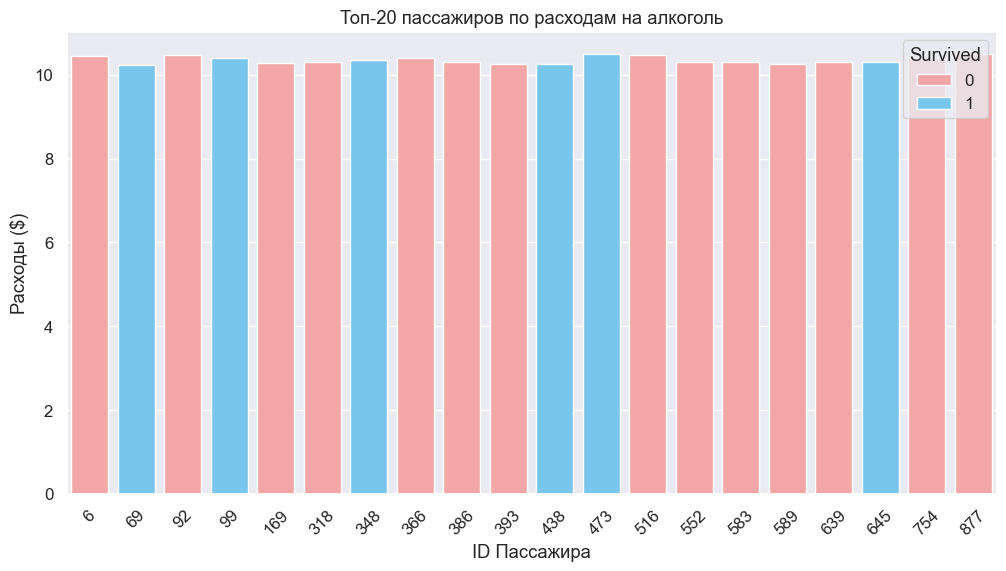

In [58]:
query = load_sql("top_alcohol_spent.sql")
# Топ-20 по расходам
df_top20 = df_alcohol.sort_values("alcohol_spend", ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(
    x="PassengerId",
    y="alcohol_spend",
    hue="Survived",
    data=df_top20,
    palette={0: "#FF9999", 1: "#66CCFF"},
    dodge=False  # столбцы сливаются по PassengerId
    )
plt.title("Топ-20 пассажиров по расходам на алкоголь")
plt.xlabel("ID Пассажира")
plt.ylabel("Расходы ($)")
plt.xticks(rotation=45)
plt.show()

На графике показаны **топ-20 пассажиров по расходам на алкоголь**.  

- **Цвет столбца** показывает, выжил пассажир или нет:  
  - Красный (#FF9999) — не выжил (0) ❌  
  - Синий (#66CCFF) — выжил (1) ✅  
- **Символ над столбцом** также указывает на выживание:  
  - ✅ = выжил (1)  
  - ❌ = не выжил (0)  
- **Ось X** — ID пассажира  
- **Ось Y** — сумма расходов на алкоголь в $  

In [55]:
query = load_sql("top_spent_passanger.sql")
df_top10

,Name,Pclass,Survived,total_spend
0,"Stone, Mrs. George Nelson (Martha Evelyn)",1,1,None
1,"Karaic, Mr. Milan",3,0,None
2,"Natsch, Mr. Charles H",1,0,None
3,"Turcin, Mr. Stjepan",3,0,None
4,"Carrau, Mr. Francisco M",1,0,None
5,"Plotcharsky, Mr. Vasil",3,0,None
6,"Stanley, Miss. Amy Zillah Elsie",3,1,None
7,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,1,None
8,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",3,1,None
9,"Barber, Miss. Ellen ""Nellie""",1,1,None


In [41]:
query = load_sql("top_nulls.sql")
null_counts = titanic_df.isnull().sum()
print("\nПропуски по колонкам:\n", null_counts)
most_null = null_counts.idxmax()
print("Больше всего пропусков в поле:", most_null)


Пропуски по колонкам:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64
Больше всего пропусков в поле: Age


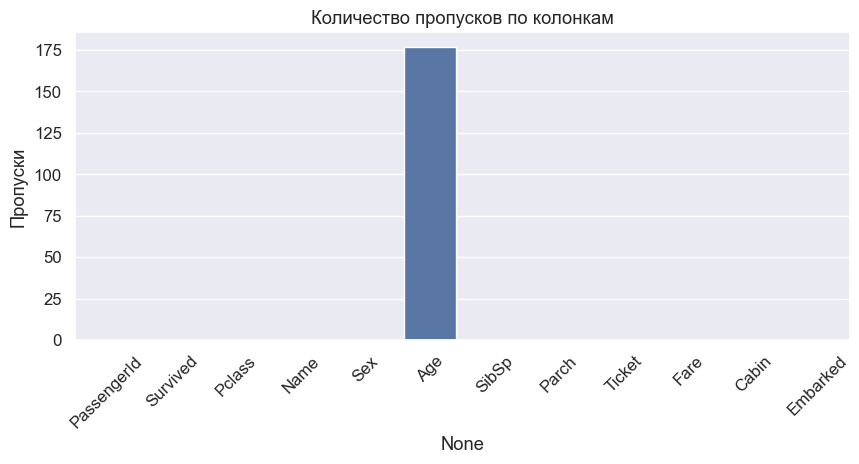

In [42]:
plt.figure(figsize=(10,4))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=45)
plt.title("Количество пропусков по колонкам")
plt.ylabel("Пропуски")
plt.show()

Больше всего пропусков было в таблице Age

In [54]:
query = load_sql("survived_no_purchase_stats.sql")
df_alcohol

,survived_no_purchase
0,5


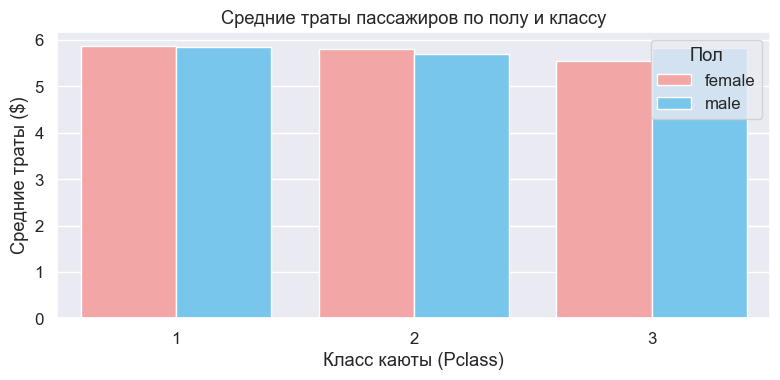

In [53]:
query = load_sql("category_avg_spent.sql")
# Переименуем колонку для графика
df_avg_spend = df_avg_spend.rename(columns={"avg_spend": "total_spend"})
plt.figure(figsize=(8,4))
sns.barplot(
    x='Pclass',
    y='total_spend',
    hue='Sex',
    data=df_avg_spend,  # <- важно указать DataFrame
    palette={'male':'#66CCFF','female':'#FF9999'}
    )

plt.title("Средние траты пассажиров по полу и классу")
plt.xlabel("Класс каюты (Pclass)")
plt.ylabel("Средние траты ($)")
plt.legend(title="Пол")
plt.tight_layout()
plt.show()

На графике изображены средние траты пассажиров по категориям 

In [72]:
query = load_sql("category_spent.sql")
df_spend_segment



,PassengerId,total_spend,spend_segment
0,234,54.82,high_spend
1,648,51.21,high_spend
2,6,50.05,high_spend
3,521,49.54,medium_spend
4,484,46.34,medium_spend
...,...,...,...
886,190,NaN,no_spend
887,607,NaN,no_spend
888,481,NaN,no_spend
889,385,NaN,no_spend


C:\Users\Акылай\AppData\Local\Temp\ipykernel_20424\2027195794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


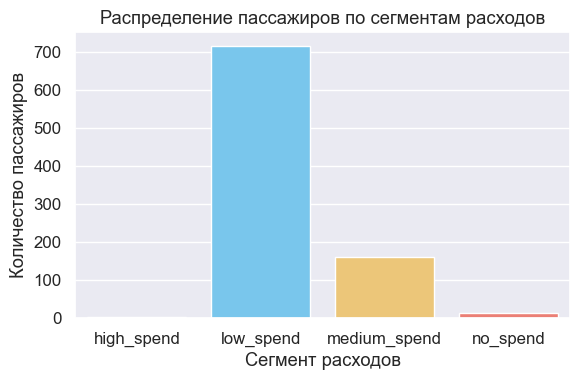

In [74]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='spend_segment',
    y='count',
    data=df_spend_segment.groupby('spend_segment').size().reset_index(name='count'),
    palette=['#B0BEC5', '#66CCFF', '#FFCC66', '#FF6F61']
)

plt.title("Распределение пассажиров по сегментам расходов")
plt.xlabel("Сегмент расходов")
plt.ylabel("Количество пассажиров")

plt.tight_layout()
plt.show()

График показывает распределение пассажиров по сегментам расходов на борту Титаника.

C:\Users\Акылай\AppData\Local\Temp\ipykernel_20424\1538664730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_amount', data=df, palette='Oranges_r')


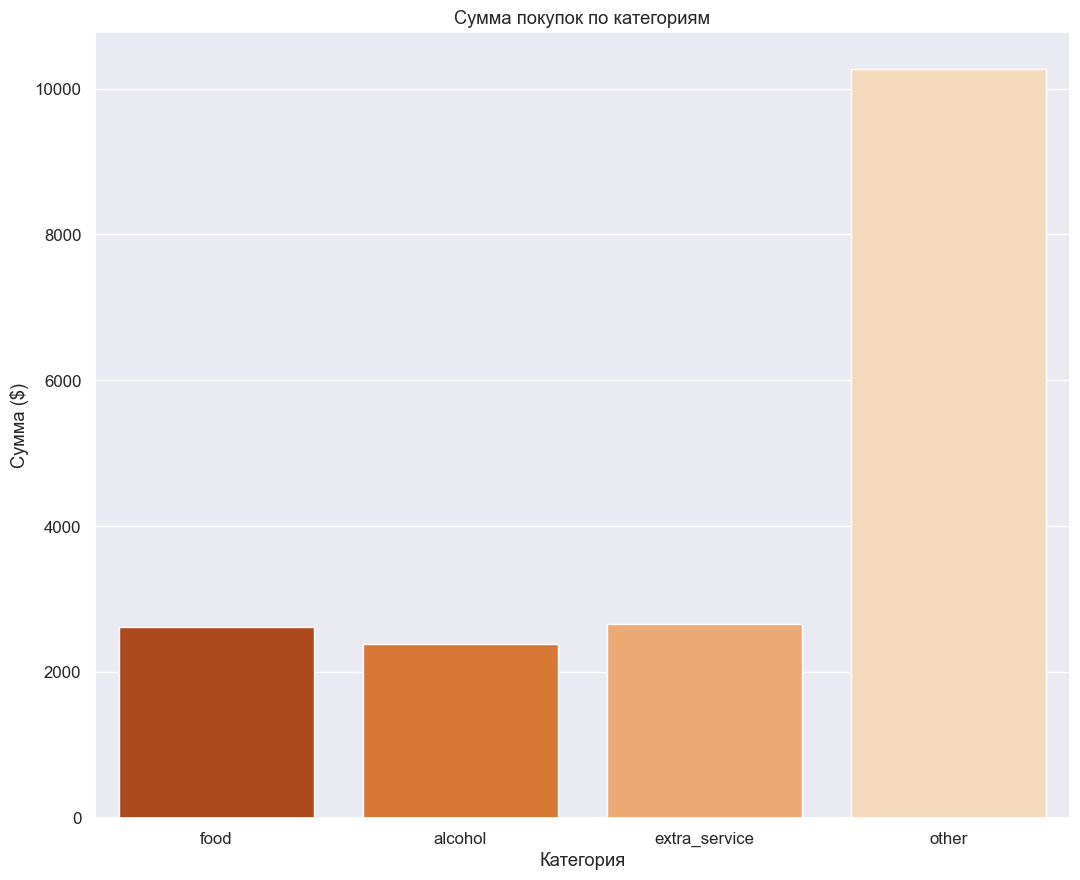

In [87]:
query = load_sql("category_sum.sql")
plt.figure(figsize=(11, 9))
sns.barplot(x='category', y='total_amount', data=df, palette='Oranges_r')
plt.title("Сумма покупок по категориям")
plt.xlabel("Категория")
plt.ylabel("Сумма ($)")
plt.tight_layout()
plt.show()


График показывает,что Пассажиры потратили больше денег на "Прочие" продукты

In [89]:
query = load_sql("difference_pclass.sql")
df_class_spend

,Pclass,total_spent
0,1,4196.30
1,3,10065.37
2,2,3675.01


C:\Users\Акылай\AppData\Local\Temp\ipykernel_20424\184316771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


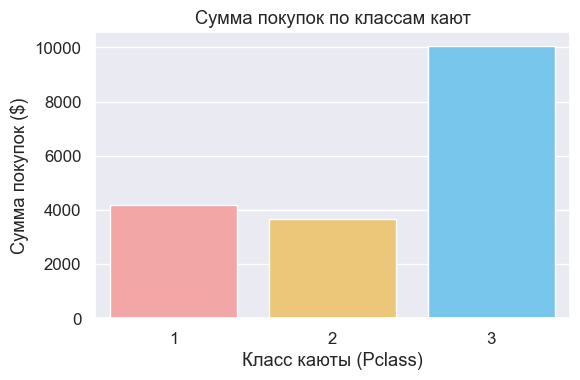

In [94]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='Pclass',
    y='total_spent',
    data=df_class_spend,
    palette=['#FF9999', '#FFCC66', '#66CCFF']  # 1й, 2й, 3й класс
)
plt.title("Сумма покупок по классам кают")
plt.xlabel("Класс каюты (Pclass)")
plt.ylabel("Сумма покупок ($)")
plt.tight_layout()
plt.show()

График показывает,что 3 класс совершил больше покупок нежели 1 и 2 классы


In [96]:
query = load_sql("lifeboat_status_count.sql")
df_lifeboat

,lifeboat_status,passengers
0,assigned,298
1,not_assigned,593


C:\Users\Акылай\AppData\Local\Temp\ipykernel_20424\3057892339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


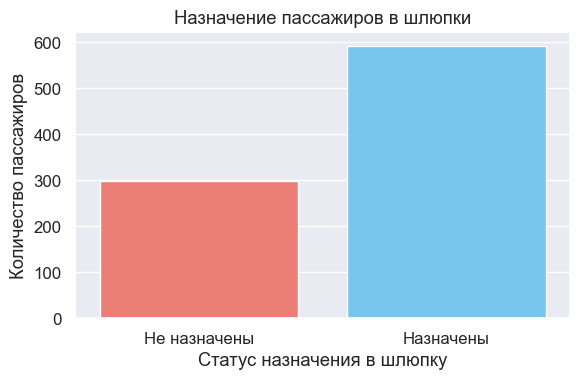

In [100]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='lifeboat_status',
    y='passengers',
    data=df_lifeboat,
    palette= ['#FF6F61','#66CCFF']  # красный = не назначены, синий = назначены
    )

plt.title("Назначение пассажиров в шлюпки")
plt.xlabel("Статус назначения в шлюпку")
plt.ylabel("Количество пассажиров")
plt.xticks([0,1], ['Не назначены', 'Назначены'])
plt.tight_layout()
plt.show()

График показывает, что назначенных в шлюпку было болььше чем не назначенных


In [149]:
query = load_sql("avg_median_purchase.sql")
df_avg_median_purchases = pd.read_sql_query(query, conn)
df_avg_median_purchases


C:\Users\Акылай\AppData\Local\Temp\ipykernel_20424\1305945619.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_median_purchases = pd.read_sql_query(query, conn)


,PassengerId,avg_amount,median_amount
0,1,5.795000,5.795
1,2,3.205000,3.205
2,3,5.063333,2.740
3,4,4.660000,4.660
4,5,6.408000,5.440
...,...,...,...
874,887,5.015000,4.275
875,888,5.907500,5.250
876,889,3.270000,3.270
877,890,5.810000,5.810
